STEP0: IMPORT NECESSARY LIBRARIES

In [27]:
# Import Necessary Libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced data visualization
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding and scaling
from sklearn.linear_model import LogisticRegression  # For logistic regression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # For evaluation
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For VIF calculation
from sklearn.feature_selection import RFE  # For Recursive Feature Elimination

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

STEP1: LOAD THE DATA SET

In [28]:
# Replace 'train.csv' with the actual path to your dataset if it's located elsewhere
try:
    df = pd.read_csv('train.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("The file 'train.csv' was not found. Please check the file path.")
    exit()

Dataset loaded successfully.


STEP2: EDA

In [29]:
# View the First Few Rows
print("\nFirst five rows of the dataset:")
print(df.head())
# Dataset Information
print("\nDataset Information:")
print(df.info())
# Check for Missing Values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())
## notice the data set is perfect, don't have any missing values

# we remove the PatientID, Diagnostics and DoctorInCharge
all_variables = df.columns.difference(['PatientID', 'Diagnosis', 'DoctorInCharge'])
print(all_variables)
print("Number of variables that we can use:", len(all_variables))



First five rows of the dataset:
   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0          1   67       0          3               0  37.205177        0   
1          2   65       1          0               0  35.141843        1   
2          3   62       0          1               1  17.875103        0   
3          4   67       0          0               1  37.503437        1   
4          5   65       1          0               2  29.187863        1   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           12.215677          7.780544     6.433890  ...                 1   
1           17.111404          6.645284     1.112379  ...                 0   
2           13.525546          9.585769     4.266008  ...                 0   
3           19.952014          1.953946     6.797333  ...                 0   
4            0.533209          8.759570     6.364302  ...                 1   

   BehavioralProblems       ADL  Co

EXplore problems within categorical variables

In [30]:

# find categorical variables
possible_categoricals = df.select_dtypes(include=['int64', 'object']).columns
categorical = []
for col in possible_categoricals:
    if df[col].dtype == 'object' or df[col].nunique() < 10:  # Threshold can be adjusted
        categorical.append(col)
print("Number of Categorical variables:", len(categorical))
print("Categorical variables:", categorical)

# we already know that there are no missing values in categorical variables :)
# Now, I will check the frequency counts of categorical variables.
for var in categorical: 
    print(df[var].value_counts())

# By checking the date set, we don't need to encode and reformate :)

Number of Categorical variables: 19
Categorical variables: ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis', 'DoctorInCharge']
Gender
1    765
0    739
Name: count, dtype: int64
Ethnicity
0    890
1    309
2    154
3    151
Name: count, dtype: int64
EducationLevel
1    588
2    454
0    311
3    151
Name: count, dtype: int64
Smoking
0    1077
1     427
Name: count, dtype: int64
FamilyHistoryAlzheimers
0    1136
1     368
Name: count, dtype: int64
CardiovascularDisease
0    1302
1     202
Name: count, dtype: int64
Diabetes
0    1264
1     240
Name: count, dtype: int64
Depression
0    1191
1     313
Name: count, dtype: int64
HeadInjury
0    1361
1     143
Name: count, dtype: int64
Hypertension
0    1276
1     228
Name: count, d

Use one hot encoding for non-binary categorical variables

In [31]:
non_binary_cat=['Ethnicity', 'EducationLevel']

pd.get_dummies(df.Ethnicity, drop_first=True, dtype=int).head()

,1,2,3
0,0,0,1
1,0,0,0
2,1,0,0
3,0,0,0
4,0,0,0


In [32]:
pd.get_dummies(df.EducationLevel, drop_first=True, dtype=int).head()

,1,2,3
0,0,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,0,1,0


Explore problems within numerical variables

There are 15 numerical variables

The numerical variables are : Index(['ADL', 'Age', 'AlcoholConsumption', 'BMI', 'CholesterolHDL',
       'CholesterolLDL', 'CholesterolTotal', 'CholesterolTriglycerides',
       'DiastolicBP', 'DietQuality', 'FunctionalAssessment', 'MMSE',
       'PhysicalActivity', 'SleepQuality', 'SystolicBP'],
      dtype='object')
          ADL     Age  AlcoholConsumption     BMI  CholesterolHDL  \
count  1504.0  1504.0              1504.0  1504.0          1504.0   
mean      5.0    75.0                10.0    28.0            60.0   
std       3.0     9.0                 6.0     7.0            23.0   
min       0.0    60.0                 0.0    15.0            20.0   
25%       2.0    67.0                 5.0    21.0            39.0   
50%       5.0    75.0                10.0    28.0            60.0   
75%       8.0    83.0                15.0    34.0            79.0   
max      10.0    90.0                20.0    40.0           100.0   

       CholesterolLDL  C

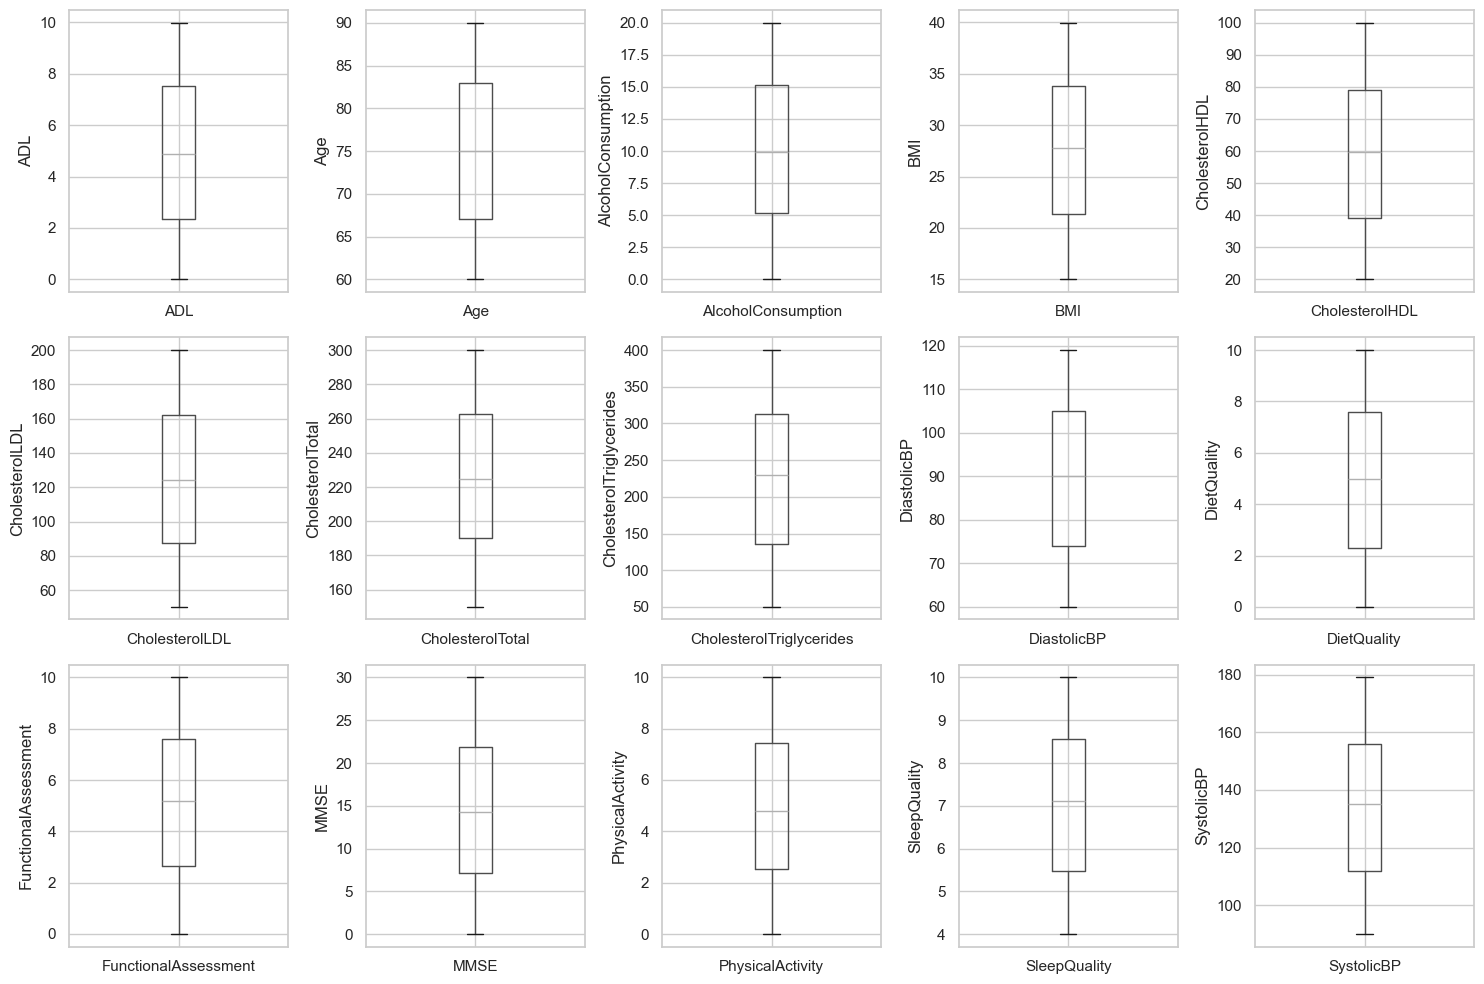

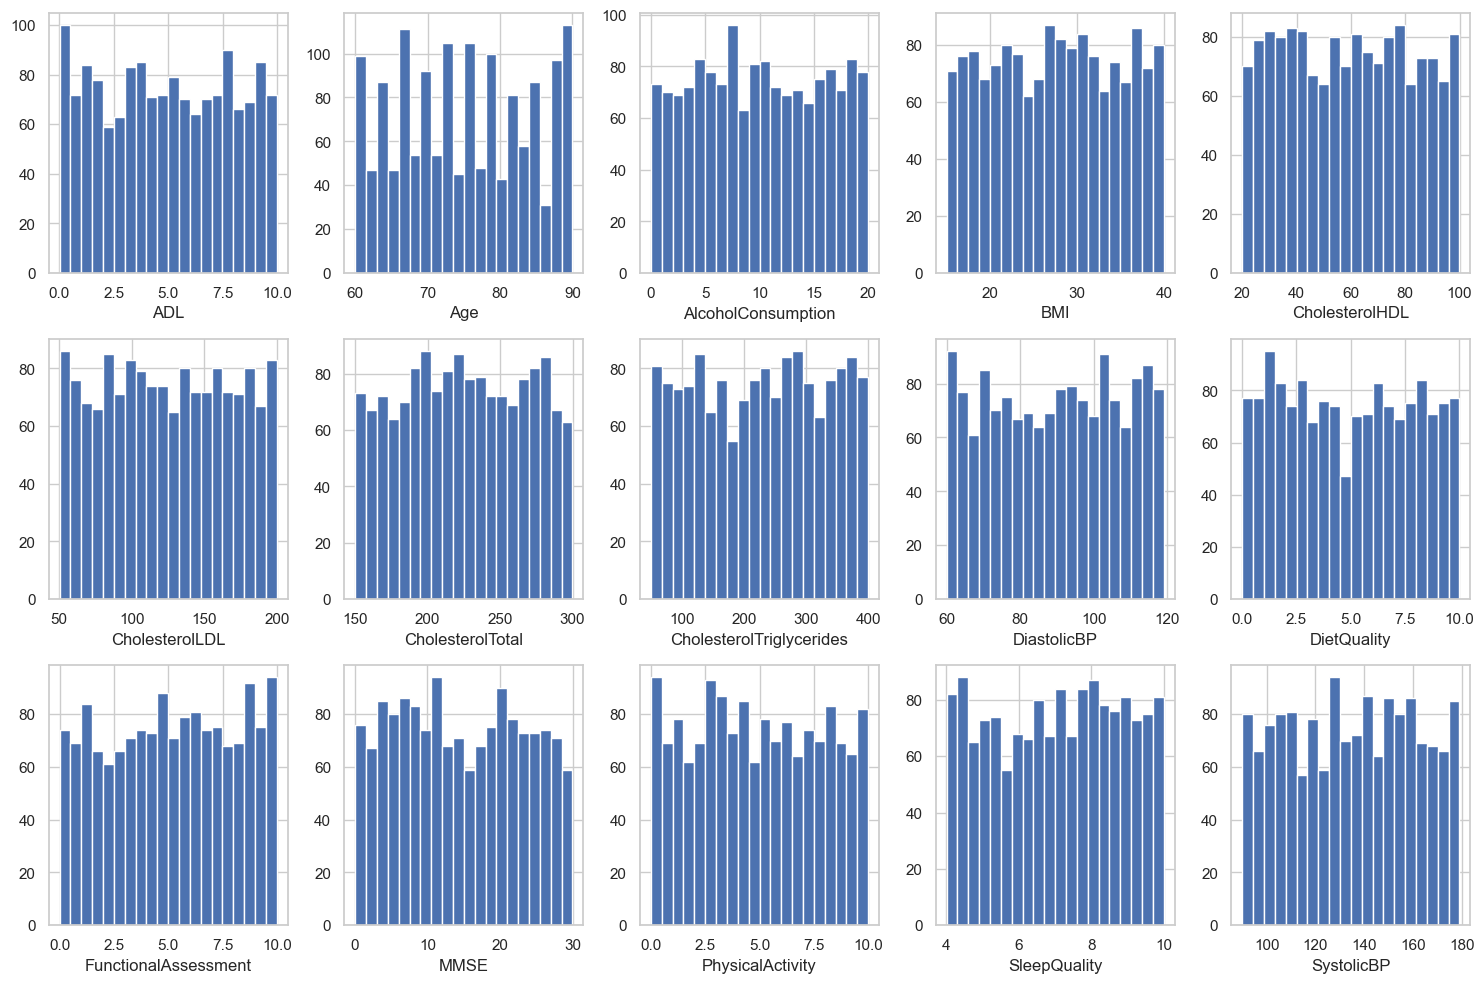

In [33]:
# find numerical variables
numerical = all_variables.difference(categorical)
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)
# we already know that there are no missing values in categorical variables :)

# view summary statistics in numerical variables
print(round(df[numerical].describe()))


# draw boxplots to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical, 1):
    plt.subplot(3, 5, i)
    fig = df.boxplot(column=col)
    fig.set_title('')
    fig.set_ylabel(col)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# plot histogram to check distribution
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical, 1):
    plt.subplot(3, 5, i)
    fig = df[col].hist(bins = 20)
    fig.set_xlabel(col)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


STEP3: Declare feature vector and target variable

In [34]:
# Define features (X) and target variable (y)
X = df.drop(['PatientID', 'Diagnosis', "DoctorInCharge"], axis=1)
y = df['Diagnosis']
print("\nFeatures and target variable defined.")


Features and target variable defined.


STEP4: Split data into separate training and test set

In [35]:
X_train, y_train,= X, y
X_train.shape

(1504, 32)

STEP5: Feature Engineering
Notice there are no missing values for all variables, so we don't need to engineering missing values here.
Since we don't see any skewed distribution for our numerical variables, we don't deal with outliers.
We don't need to encode categorical variables

In [36]:
X_train = pd.concat(
    [
        X_train[numerical],  # Include numerical features
        pd.get_dummies(X_train.Ethnicity, prefix="Ethnicity", dtype=int),
        pd.get_dummies(X_train.EducationLevel, prefix="EducationLevel", dtype=int), 
    ],
    axis=1
)

In [37]:
X_train.head()

,ADL,Age,AlcoholConsumption,BMI,CholesterolHDL,CholesterolLDL,CholesterolTotal,CholesterolTriglycerides,DiastolicBP,DietQuality,...,SleepQuality,SystolicBP,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,EducationLevel_0,EducationLevel_1,EducationLevel_2,EducationLevel_3
0,6.009376,67,12.215677,37.205177,78.049441,118.891075,270.167740,272.804019,114,6.433890,...,6.744820,137,0,0,0,1,1,0,0,0
1,7.519209,65,17.111404,35.141843,21.152397,100.588771,227.265727,156.879638,82,1.112379,...,7.568751,111,1,0,0,0,1,0,0,0
2,8.573933,62,13.525546,17.875103,36.973033,184.974822,202.419742,288.788181,108,4.266008,...,8.247084,131,0,1,0,0,0,1,0,0
3,6.217530,67,19.952014,37.503437,62.169786,150.744105,235.942629,195.954579,76,6.797333,...,7.666498,121,1,0,0,0,0,1,0,0
4,5.193683,65,0.533209,29.187863,82.865450,125.429630,292.337817,295.682210,117,6.364302,...,6.231143,158,1,0,0,0,0,0,1,0


STEP6: Feature scaling

In [38]:
X_train.describe()
cols = X_train.columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=[cols])
X_train.describe()

,ADL,Age,AlcoholConsumption,BMI,CholesterolHDL,CholesterolLDL,CholesterolTotal,CholesterolTriglycerides,DiastolicBP,DietQuality,...,SleepQuality,SystolicBP,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,EducationLevel_0,EducationLevel_1,EducationLevel_2,EducationLevel_3
count,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,...,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000
mean,0.491476,0.496853,0.501754,0.503037,0.494035,0.497952,0.500980,0.504941,0.503516,0.493337,...,0.506739,0.502323,0.591755,0.205452,0.102394,0.100399,0.206782,0.390957,0.301862,0.100399
std,0.293748,0.298336,0.287435,0.288628,0.288981,0.290542,0.282434,0.292190,0.299485,0.294076,...,0.292240,0.289343,0.491672,0.404166,0.303266,0.300631,0.405132,0.488127,0.459218,0.300631
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.236172,0.233333,0.260293,0.254997,0.239369,0.248201,0.269434,0.245757,0.237288,0.229566,...,0.246320,0.247191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.488900,0.500000,0.496456,0.511689,0.495028,0.495588,0.495914,0.512530,0.508475,0.497538,...,0.516543,0.505618,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.753675,0.766667,0.757444,0.752965,0.736498,0.745901,0.749882,0.751444,0.762712,0.757560,...,0.758292,0.741573,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


STEP7: Model training

This is the full model with usual ridge penalty $\lambda=\frac{1}{C}=1$

In [39]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Define the range of C values
C_values = np.arange(0.01, 5.01, 0.01)

# Initialize variables to store the best C and its score
best_C = None
best_score = -np.inf  # Start with a very low score
scores_dict = {}  # To store scores for all C values

# Loop over each value of C
for C in C_values:
    # Instantiate the model with the current C value
    logreg = LogisticRegression(penalty='l1', C=C, solver='liblinear', random_state=0)
    
    # Apply 5-Fold Cross Validation
    scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')
    
    # Compute Average cross-validation score
    avg_score = scores.mean()
    scores_dict[C] = avg_score  # Store the score for this C value
    
    # Update best C and score if this is the best so far
    if avg_score > best_score:
        best_C = C
        best_score = avg_score

# Print the best C and its score
print("\nBest C value:", best_C)
print("Best cross-validation score: {:.4f}".format(best_score))


Best C value: 0.14
Best cross-validation score: 0.7806


In [40]:
# Define the range of C values
C_values = np.arange(0.01, 5.01, 0.01)

# Initialize variables to store the best C and its score
best_C = None
best_score = -np.inf  # Start with a very low score
scores_dict = {}  # To store scores for all C values

# Loop over each value of C
for C in C_values:
    # Instantiate the model with the current C value
    logreg = LogisticRegression(penalty='l2', C=C, solver='liblinear', random_state=0)
    
    # Apply 5-Fold Cross Validation
    scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')
    
    # Compute Average cross-validation score
    avg_score = scores.mean()
    scores_dict[C] = avg_score  # Store the score for this C value

    
    # Update best C and score if this is the best so far
    if avg_score > best_score:
        best_C = C
        best_score = avg_score

# Print the best C and its score
print("\nBest C value:", best_C)
print("Best cross-validation score: {:.4f}".format(best_score))


Best C value: 1.28
Best cross-validation score: 0.7753


In [41]:
final_model1 = LogisticRegression(penalty='l1', C=0.14, solver='liblinear', random_state=0)
final_model1.fit(X_train, y_train)

LogisticRegression(C=0.14, penalty='l1', random_state=0, solver='liblinear')

In [42]:
final_model2 = LogisticRegression(penalty='l2', C=1.28, solver='liblinear', random_state=0)
final_model2.fit(X_train, y_train)

LogisticRegression(C=1.28, random_state=0, solver='liblinear')

STEP10: Confusion matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

Confusion matrix

 [[881  91]
 [235 297]]

True Positives(TP) =  881

True Negatives(TN) =  297

False Positives(FP) =  91

False Negatives(FN) =  235


<Axes: >

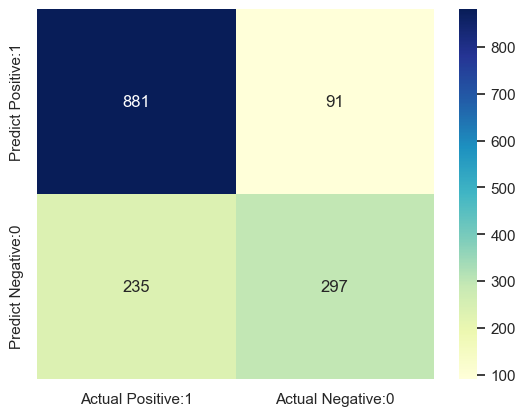

In [43]:
y_pred_test1 = final_model1.predict(X_train)
y_pred_test1
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_test1)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Confusion matrix

 [[881  91]
 [235 297]]

True Positives(TP) =  881

True Negatives(TN) =  297

False Positives(FP) =  91

False Negatives(FN) =  235


<Axes: >

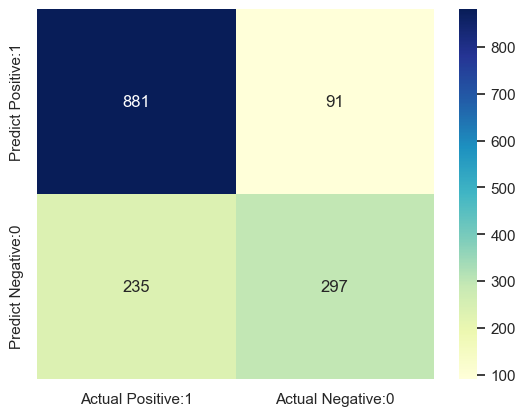

In [44]:
y_pred_test2 = final_model2.predict(X_train)
y_pred_test2
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_test1)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

STEP11: Classification metrices

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred_test1))
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))


              precision    recall  f1-score   support

           0       0.79      0.91      0.84       972
           1       0.77      0.56      0.65       532

    accuracy                           0.78      1504
   macro avg       0.78      0.73      0.74      1504
weighted avg       0.78      0.78      0.77      1504

Classification accuracy : 0.7832
Classification error : 0.2168
Precision : 0.9064
Recall or Sensitivity : 0.7894
True Positive Rate : 0.7894
False Positive Rate : 0.2345
Specificity : 0.7655


In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred_test2))
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       972
           1       0.73      0.60      0.66       532

    accuracy                           0.78      1504
   macro avg       0.77      0.74      0.75      1504
weighted avg       0.78      0.78      0.78      1504

Classification accuracy : 0.7832
Classification error : 0.2168
Precision : 0.9064
Recall or Sensitivity : 0.7894
True Positive Rate : 0.7894
False Positive Rate : 0.2345
Specificity : 0.7655


STEP12: ROC-AOC

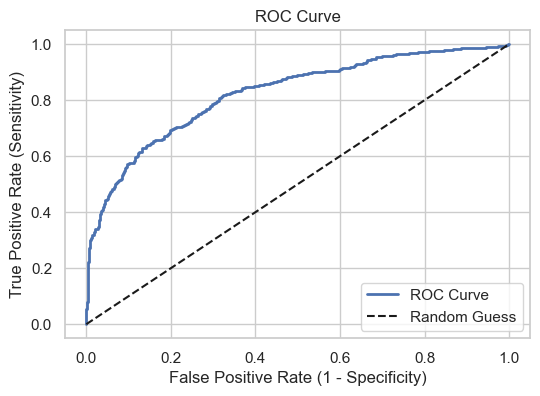

In [47]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Assuming y_test has binary values 0 and 1
y_pred1 = final_model1.predict_proba(X_train)[:, 1]  # Get positive class probabilities

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred1, pos_label=1)  # Change pos_label to match y_test

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.rcParams['font.size'] = 12
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='lower right')
plt.show()


In [48]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_train, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))


ROC AUC : 0.8249


Final step: test our model

In [49]:

# Load and preprocess the test data
test_data = pd.read_csv('test.csv')
X_test = test_data.drop(['PatientID', 'DoctorInCharge'], axis=1)
X_test_final = pd.concat(
    [
        X_test[numerical],  # Include numerical features
        pd.get_dummies(X_test.Ethnicity, prefix="Ethnicity", dtype=int),
        pd.get_dummies(X_test.EducationLevel, prefix="EducationLevel", dtype=int), 
    ],
    axis=1
)

X_test_final_scaled = scaler.transform(X_test_final)

# Make predictions with a custom threshold of 0.35
test_probabilities = final_model1.predict_proba(X_test_final_scaled)[:, 1]  # Get probabilities for the positive class
test_predictions = (test_probabilities >= 0.37).astype(int)  # Apply the 0.4 threshold

print("Predictions made on test data with a threshold of 0.37.")

# Prepare and save the submission file
submission = pd.DataFrame({
    'PatientID': test_data['PatientID'],
    'Diagnosis': test_predictions
})

# Save to CSV
submission.to_csv('test_predictions.csv', index=False)
print("\nSubmission file 'test_predictions.csv' created successfully with the following format:")
print(submission.head())


Predictions made on test data with a threshold of 0.37.

Submission file 'test_predictions.csv' created successfully with the following format:
   PatientID  Diagnosis
0       1505          1
1       1506          0
2       1507          0
3       1508          1
4       1509          1
